## Statistical Analysis with NHANES

Background knowledge:

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

#### NHANES: National Health and Nutrition Examination Survey
source: https://www.cdc.gov/nchs/nhanes/about_nhanes.htm

#### Below, we are analyzing NHANES data with multivariate analysis and regression.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [12]:
da = pd.read_csv("nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [13]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

Here we use a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2) in terms of gender. Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

In [51]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

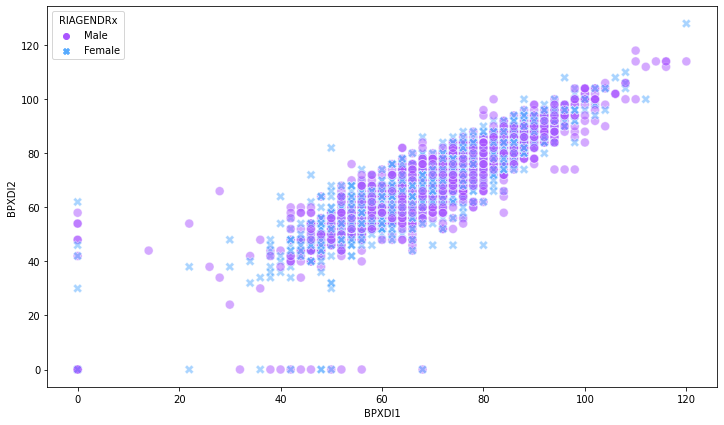

In [60]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=da, x = "BPXDI1", y = "BPXDI2", alpha=0.5, 
                hue='RIAGENDRx', palette='cool_r',
                legend='full', style='RIAGENDRx', s=80)

From the graph above we can see that BPXDI1 and BPXDI2 basically have a linear relationship

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


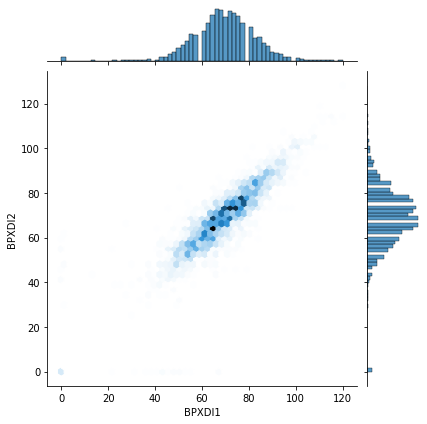

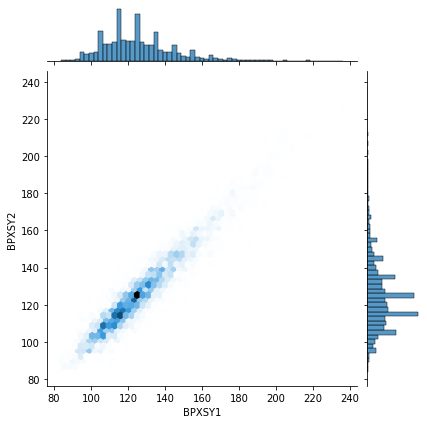

In [67]:

print(da[["BPXDI1", "BPXDI2"]].dropna().corr())
sns.jointplot(x = "BPXDI1", y = "BPXDI2", data = da, kind = 'hex')
print("")
print(da[["BPXSY1", "BPXSY2"]].dropna().corr())
sns.jointplot(x = "BPXSY1", y = "BPXSY2", data = da, kind = 'hex')

Next, let's construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

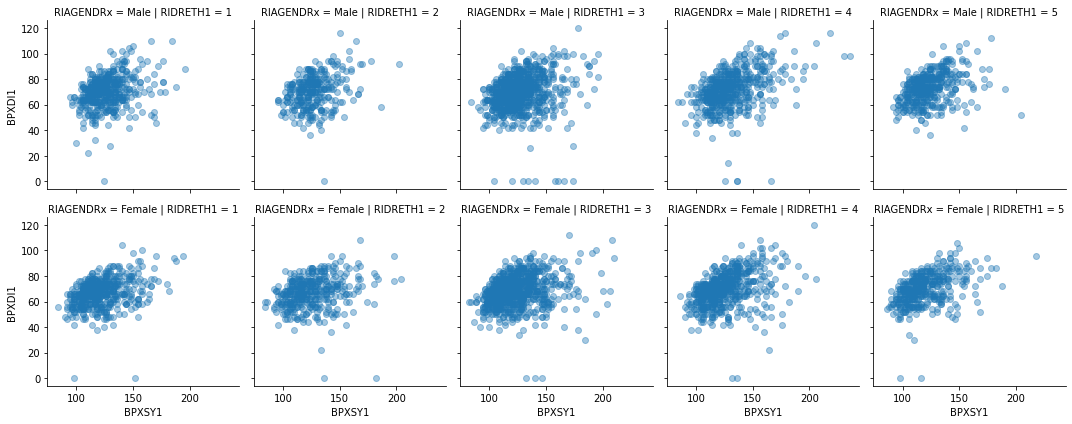

In [64]:
_ = sns.FacetGrid(da, row = "RIAGENDRx", col = "RIDRETH1").map(plt.scatter,"BPXSY1", "BPXDI1", alpha = 0.4)

In [4]:
# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
da = da[vars].dropna()

#### Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [6]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Sun, 27 Mar 2022   Prob (F-statistic):              0.131
Time:                        21:17:46   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the analysis above, we can see that body BMI and age are nearly uncorrelated in this dataset. The average BMI between a 40 year old and a 20 year old can be calculated as 0.0091 * 20 = 0.182

#### Add gender and ethnicity as additional control variables to the linear model relating BMI to age. 

In [10]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1:"Mexican American", 2:"Other Hispanic",
                                      3:"Non-Hispanic White", 4:"Non-Hispanic Black",
                                      5:"Other Race - Including Multi-Racial"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})

In [11]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           5.55e-27
Time:                        21:22:43   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.6846      0.682     46.453      0.000      30.347      33.023
RIDRETH1x[T.Non-Hispanic Black]                     -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non-Hispanic White]                     -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Other Hispanic]                         -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIAGENDRx[T.Male]                                   -1.2017      0.407     -2.949      0.003      -2.001      -0.402
RIDAGEYR                                             0.0058      0.010      0.560      0.576      -0.015       0.026
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The mean relationship between BMI and age dropped from 0.0091 to 0.0065 when added additional covariates to the model.
The standard error for the regression parameter for age also dropped from 0.006 to 0.005 after adding additional covariates to the model (The ethnicity of Mexican American and Female is selected by the software as the reference level.)

From the above analysis, we can see that for example:

the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man is -0.45 * 10 = -4.5;
the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man is 
-1.02 + 0*0.0065 = -1.02

#### Randomly sample 25% of the NHANES data, then fit the same model used above to this data set.

In [10]:
dax = da.sample(frac = 0.25)
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data = dax)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.868
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           6.43e-07
Time:                        10:22:20   Log-Likelihood:                -1250.6
No. Observations:                 368   AIC:                             2515.
Df Residuals:                     361   BIC:                             2542.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           32.0734      1.392     23.034      0.000      29.335      34.812
RIDRETH1x[T.Non-Hispanic Black]                     -1.4317      1.163     -1.231      0.219      -3.719       0.856
RIDRETH1x[T.Non-Hispanic White]                     -1.1506      1.177     -0.978      0.329      -3.464       1.163
RIDRETH1x[T.Other Hispanic]                         -2.6816      1.409     -1.903      0.058      -5.452       0.089
RIDRETH1x[T.Other Race - Including Multi-Racial]    -6.5466      1.254     -5.221      0.000      -9.012      -4.081
RIAGENDRx[T.Male]                                   -1.4920      0.855     -1.746      0.082      -3.173       0.189
RIDAGEYR                                             0.0115      0.022      0.522      0.602      -0.032       0.055
==============================================================================
Omnibus:                       53.783   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.403
Skew:                           0.937   Prob(JB):                     5.73e-18
Kurtosis:                       4.292   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the result that the values of the estimated regression coefficients all went up as well as the standard errors. Even though the coefficients all changed a bit, the way of how they affect the dataset stays the same.

#### Use a scatterplot of the residuals against the fitted values for the model

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


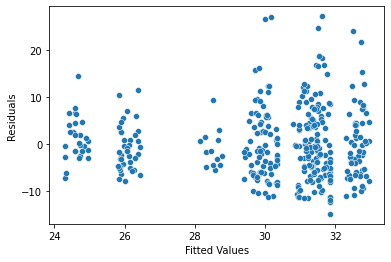

In [11]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted Values")
_ = pp.set_ylabel("Residuals")

The variance increases systematically with the mean with the range 27 to 28.5 being empty.

#### Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Find the marginal probability, odds, and log odds of this variable for women and for men.  Then we calculate the odds ratio for females relative to males.

In [16]:
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
da = da[vars].dropna()

In [17]:
da["ALQ"] = da.ALQ110.replace({2:0, 7:np.nan, 9:np.nan})

we look at the odds of "at least 12 drinks in their lifetime" for women and men separately.

In [20]:
c = pd.crosstab(da.RIAGENDRx, da.ALQ).apply(lambda x: x/x.sum(), axis = 1)
c["odds"] = c.loc[:,1] / c.loc[:,0]
c

ALQ,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549228,0.450772,0.820738
Male,0.537037,0.462963,0.862069


We see that th probability that a women has ever had at least 12 drinks in their lifetime is slightly lower than the probability for man (45% v.s. 46%). 
This is reflected in the odds for a woman has had at least 12 drinks in their lifetime being a little less than 1 (around 0.82), and the odds for a man is around 0.86.

In [21]:
c["logodds"] = np.log(c.odds)
c

ALQ,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,0.820738,-0.197551
Male,0.537037,0.462963,0.862069,-0.148420


The log odds for both males and females are close to 0, consistent with around half of both males and females having had "at least 12 drinks in their lifetime".

#### Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable constructed above) in terms of gender.

In [22]:
model = sm.GLM.from_formula("ALQ ~ RIAGENDRx", family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ALQ   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Thu, 23 Dec 2021   Deviance:                       2022.6
Time:                        10:23:18   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1976      0.062     -3.164      0.002      -0.320      -0.075
RIAGENDRx[T.Male]     0.0491      0.115      0.427      0.669      -0.176       0.274
=====================================================================================
"""

c.logodds.Male - c.logodds.Female = 0.0491311. We can confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated before.

#### Use logistic regression to explore the relation between drinking and age, gender, and education.

In [32]:
# Create a labeled version of the educational attainment variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

In [34]:
model = sm.GLM.from_formula("ALQ ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ALQ   No. Observations:                 1467
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.65
Date:                Thu, 23 Dec 2021   Deviance:                       1975.3
Time:                        10:53:43   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4849      0.193     -2.519      0.012      -0.862      -0.108
RIAGENDRx[T.Male]            0.0313      0.117      0.267      0.789      -0.198       0.261
DMDEDUC2x[T.HS]             -0.0278      0.163     -0.170      0.865      -0.348       0.292
DMDEDUC2x[T.SomeCollege]     0.1147      0.152      0.756      0.450      -0.183       0.412
DMDEDUC2x[T.lt9]            -0.8479      0.176     -4.814      0.000      -1.193      -0.503
DMDEDUC2x[T.x9_11]          -0.4496      0.190     -2.367      0.018      -0.822      -0.077
RIDAGEYR                     0.0090      0.003      2.975      0.003       0.003       0.015
============================================================================================
"""

Education and Age (with a very small p-value) show a statistically significant association with drinking based on the results above.